In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib 

In [2]:
nuevasmetricas=pd.read_csv("metricas2.csv",index_col=0)
meansIndexes=nuevasmetricas.groupby("question").mean()

In [3]:
meansIndexes.describe()

,overlap,jaccard,sorensen
count,36.000000,36.000000,36.000000
mean,0.160699,0.064402,0.104539
std,0.068123,0.036957,0.053004
min,0.049800,0.015631,0.027792
25%,0.112099,0.035448,0.063140
50%,0.161158,0.059020,0.102277
75%,0.217586,0.080275,0.126135
max,0.315713,0.160511,0.215111


In [4]:
meansFiltered=meansIndexes[meansIndexes['sorensen']>0.10].reset_index()

In [5]:
#meansFiltered['question'] = meansFiltered['column name'].str.replace('P','Q')

In [6]:
def fixLabel(string):
    string=string.replace("P", "Q")
    string=string[:2] + ' ' + string[2:]
    if string in ['Q1 2020','Q2 2019','Q4 2020']:
        string2=string+" "+"stages"
    elif string in ['Q2 2020','Q5 2015']:
        string2=string+" "+"differences"
    elif string in ["Q6 2020","Q5 2020"]:
        string2=string+" "+"bottlenecks"
    else:
        string2="Q1 2017 "+"stages,bottlenecks and differences"
    return string2

In [7]:
uniqueQuestions=[]
edges=[]
for questions in meansFiltered['question']:
    questionsSplits=questions.split("-")
    question0=fixLabel(questionsSplits[0])
    question1=fixLabel(questionsSplits[1])
    uniqueQuestions.append(question0)
    uniqueQuestions.append(question1)
    edges.append((question0,question1))

In [8]:
nodes=list(set(uniqueQuestions))

In [9]:
nodes

['Q2 2020 differences',
 'Q5 2020 bottlenecks',
 'Q5 2015 differences',
 'Q6 2020 bottlenecks',
 'Q1 2020 stages',
 'Q1 2017 stages,bottlenecks and differences',
 'Q2 2019 stages',
 'Q4 2020 stages']

In [10]:
edges

[('Q1 2017 stages,bottlenecks and differences',
  'Q1 2017 stages,bottlenecks and differences'),
 ('Q1 2017 stages,bottlenecks and differences', 'Q2 2019 stages'),
 ('Q1 2017 stages,bottlenecks and differences', 'Q5 2020 bottlenecks'),
 ('Q1 2017 stages,bottlenecks and differences', 'Q6 2020 bottlenecks'),
 ('Q1 2020 stages', 'Q1 2020 stages'),
 ('Q2 2019 stages', 'Q1 2020 stages'),
 ('Q2 2019 stages', 'Q2 2019 stages'),
 ('Q2 2020 differences', 'Q2 2020 differences'),
 ('Q4 2020 stages', 'Q5 2020 bottlenecks'),
 ('Q4 2020 stages', 'Q6 2020 bottlenecks'),
 ('Q5 2015 differences', 'Q1 2017 stages,bottlenecks and differences'),
 ('Q5 2015 differences', 'Q1 2020 stages'),
 ('Q5 2015 differences', 'Q2 2019 stages'),
 ('Q5 2015 differences', 'Q2 2020 differences'),
 ('Q5 2015 differences', 'Q5 2015 differences'),
 ('Q5 2020 bottlenecks', 'Q5 2020 bottlenecks'),
 ('Q5 2020 bottlenecks', 'Q6 2020 bottlenecks'),
 ('Q6 2020 bottlenecks', 'Q6 2020 bottlenecks')]

In [11]:
gp=nx.Graph()
gp.add_nodes_from(nodes)
gp.add_edges_from(edges)

In [12]:
posFixed={
        'Q2 2020 differences': np.array([ 0.2339124, 0.2        ]),
        'Q1 2020 stages': np.array([0.18656612, 0.1133303 ]),
        'Q4 2020 stages': np.array([-0.30196476,  0.28807911]),
        'Q2 2019 stages': np.array([0.07927056, 0.01831406]),
        'Q1 2017 stages,bottlenecks and differences': np.array([-0.08965428,  0.0620876 ]),
        'Q5 2020 bottlenecks': np.array([-0.20139872,  0.15125941]),
        'Q6 2020 bottlenecks': np.array([-0.13991147,  0.22530745]),
        'Q5 2015 differences': np.array([-0.00629868,  0.14162209])
}

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


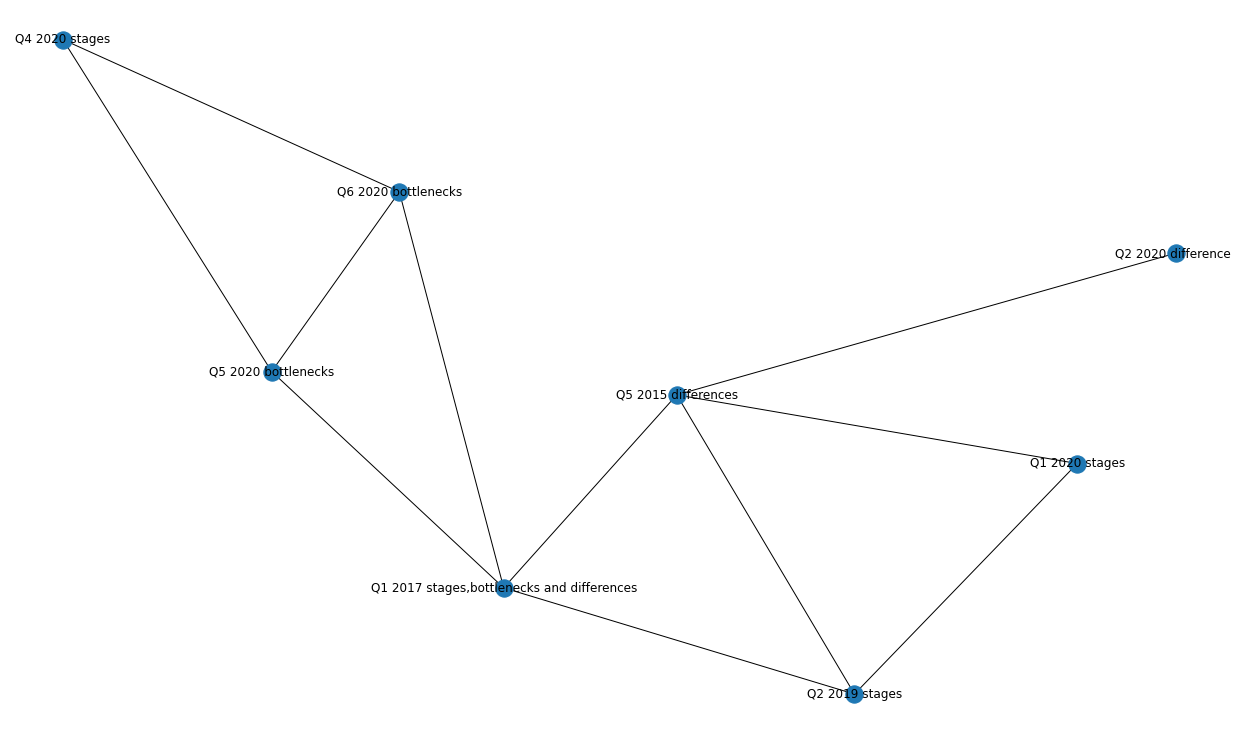

In [15]:
nx.draw(gp,
        posFixed,
        #nodelist=nodes,                         
        edgelist=edges, 
        with_labels=True
       )
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17,10)
#matplotlib.pyplot.savefig('graphQuestionsVariants0.10.pdf')

In [29]:
#-------------------------------------------------------------------------------------------------------------------------------
#comparando las posibles agrupaciones del grafo

In [40]:
df_prueba = pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_prueba['duplaPreg']=[ question+str(year) for year,question in zip(df_prueba['Year'],df_prueba['Question']) ]

In [41]:
df_prueba.head()

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization,duplaPreg
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-19 09:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin,P22020
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 10:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin,P22020
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-19 11:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity,P22020
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 12:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity,P22020
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-19 13:37:02.248560,P2,A7,2020,Academic,Analyze Cycle Time,A72020,GermanResearchCenterforArtificialIntelligenceDFKI,P22020


In [32]:
p4p5p62020=df_prueba[df_prueba['duplaPreg'].isin(["P52020","P62020","P42020"])].groupby("Question").apply(lambda x: x['concept:name'].unique())

In [116]:
p4p5p62020[0]

array(['Filter activities', 'Group activities', 'Calculate cycle time',
       'Calculate throughput', 'Calculate number of elements',
       'Represent scatterplot', 'Represent process map',
       'Represent bar charts', 'Identify bottlenecks',
       'Filter variants depending on frequency', 'Represent histograms',
       'Preprocess the traces of the logs', 'Represent heatmaps',
       'Filter traces', 'Calculate average of activities per trace',
       'Group traces', 'Calculate frequency', 'Identify attributes',
       'Identify transitions by cycle time', 'Compare cycle time',
       'Calculate percentages', 'Identify traces by cycle time',
       'Represent temporal series', 'Identify activities',
       'Calculate statistics', 'Identify roles'], dtype=object)

In [117]:
int1=set.intersection(set(p4p5p62020[0]), set(p4p5p62020[1]), set(p4p5p62020[2]))

In [125]:
int1

{'Calculate cycle time',
 'Calculate frequency',
 'Calculate number of elements',
 'Compare cycle time',
 'Filter activities',
 'Filter traces',
 'Identify bottlenecks',
 'Identify transitions by cycle time',
 'Represent histograms',
 'Represent process map'}

In [23]:
#comparando las operaciones comunes entre pares de aristas (variantes):

In [70]:
def intersection(val1,val2):
    
    print("Teniendo en cuenta todas:")
    vc=df_prueba[df_prueba['duplaPreg']==val1]['Variant'].value_counts()
    vc2=df_prueba[df_prueba['duplaPreg']==val2]['Variant'].value_counts()
    
    inter=set(vc.index).intersection(vc2.index)
    for act in inter:
        print(act)
        print()
    print("-------------------------")
    print("Teniendo en cuenta solo las frecuentes:")
    media1=np.mean(vc)
    media2=np.mean(vc2)
    interFrec=set(vc[vc>media1].index).intersection(vc2[vc2>media2].index)
    for act in interFrec:
        print(act)
        print()
    

In [83]:
intersection("P52015","P22020")

Teniendo en cuenta todas:
Calculate cycle time of the whole process for all traces

Calculate number of traces

Represent temporal series of traces

Calculate Statistics of attributes

Represent bar charts of traces

Identify values of attributes

Represent histograms of cycle time

Compare cycle time

Group traces depending on attributes

Calculate frequency of activities

Calculate Statistics of cycle time

Calculate cycle time of the whole process for each subset of traces

Filter traces by activities

-------------------------
Teniendo en cuenta solo las frecuentes:
Calculate Statistics of cycle time

Compare cycle time

Represent histograms of cycle time

